In [1]:
MASTER_PATH = "/mnt/4TBSSD/ntnhu/"
DISK_PATH = "/mnt/shared_48tb/"
VBS_PATH = "vbs"
MARINE_PATH = "marine"
MARINE_VIDEO_PATH = "extracted/MarineVideoKit"
V3C_KEYFRAME_DATA_PATH = "VBS2022"
V3C1_VIDEO_DATA_PATH = "V3C1_videos"
V3C2_VIDEO_DATA_PATH = "V3C2_videos"

In [2]:
# import clip
import os
import os.path as osp
import sys
import joblib
import yaml
import pickle
import clip
import dataset_helpers
# import configs

# sys.path.insert(1, osp.join(MASTER_PATH, "helpers_lib"))
import helpers
import time


/home/ntnhu/.conda/envs/ntnhu_clip/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# folder to load config file
CONFIG_PATH = ""

# Function to load yaml configuration file
def load_config(config_name):
    with open(os.path.join(CONFIG_PATH, config_name)) as file:
        config = yaml.safe_load(file)

    return config


config = load_config("configs.yml")

### Marine Dataset

In [4]:
video_path = osp.join(DISK_PATH, VBS_PATH, MARINE_PATH, MARINE_VIDEO_PATH, "videos")
video_ids = helpers.sort_list(os.listdir(video_path))
video_names = [osp.join(video_path, x) for x in video_ids]

thumb_path = osp.join(DISK_PATH, VBS_PATH, MARINE_PATH, MARINE_VIDEO_PATH, "information/thumbnails")
thumb_ids = helpers.sort_list(os.listdir(thumb_path))
# thumb_names = [osp.join(thumb_path, x) for x in thumb_ids]

frame_path = osp.join(DISK_PATH, VBS_PATH, MARINE_PATH, MARINE_VIDEO_PATH, "information/selected_frames")
frame_ids = helpers.sort_list(os.listdir(frame_path))
frame_names = [osp.join(frame_path, x)[21:] for x in frame_ids]

In [5]:
frame_names[0]

'marine/extracted/MarineVideoKit/information/selected_frames/Ambon_Apr2012_0001_00001.jpg'

In [6]:
DATASET_NAME = "marine"
EMBEDDING_PATH = osp.join(DISK_PATH, VBS_PATH, 'embedding_features')
FEATURE_DICT_PATH = osp.join(EMBEDDING_PATH, f'{DATASET_NAME}_L14_336_features_128.pkl')
FEATURE_PATH = osp.join(EMBEDDING_PATH, f'{DATASET_NAME}_L14_336_features_128')

print("Dataset name: ", DATASET_NAME)
# clip = CLIPSearchEngine(src_path=DATASET_MASTER_PATH, feature_path=args.feature_path, batch_size=args.batch_size, generate_features=args.generate_features)
if DATASET_NAME == 'marine':
    dataset_path = osp.join(MARINE_PATH, MARINE_VIDEO_PATH)
elif DATASET_NAME == 'V3C':
    dataset_path = osp.join(V3C_KEYFRAME_DATA_PATH, 'keyframes')
src_path = osp.join(DISK_PATH, VBS_PATH)
image_name_path = osp.join(src_path, f'{DATASET_NAME}_filenames.txt')

clip_model = dataset_helpers.CLIPSearchEngine(DATASET_NAME, src_path=osp.join(DISK_PATH, VBS_PATH), feature_path=FEATURE_DICT_PATH, generate_features=True, dataset_path=dataset_path, image_name_path=image_name_path)
# clip_model.encode_dataset(entire_dataset=True)

Dataset name:  marine


In [7]:
clip_model.load_features()

Loading feature files ...
Function load_features elapsed time: 0:00:00.271486


In [8]:
# !python3 dataset_helpers.py

In [9]:
query = 'two cats on the street'


In [10]:
begin = time.time()
best_images = clip_model.search_query(query, num_matches=1000, ss_type='other')
end = time.time()
print("Time: ", end - begin)
# print("Length of features: ", len(clip.features))

Loading all image names ...
/mnt/shared_48tb/vbs/marine_filenames.txt
Time:  0.8274991512298584


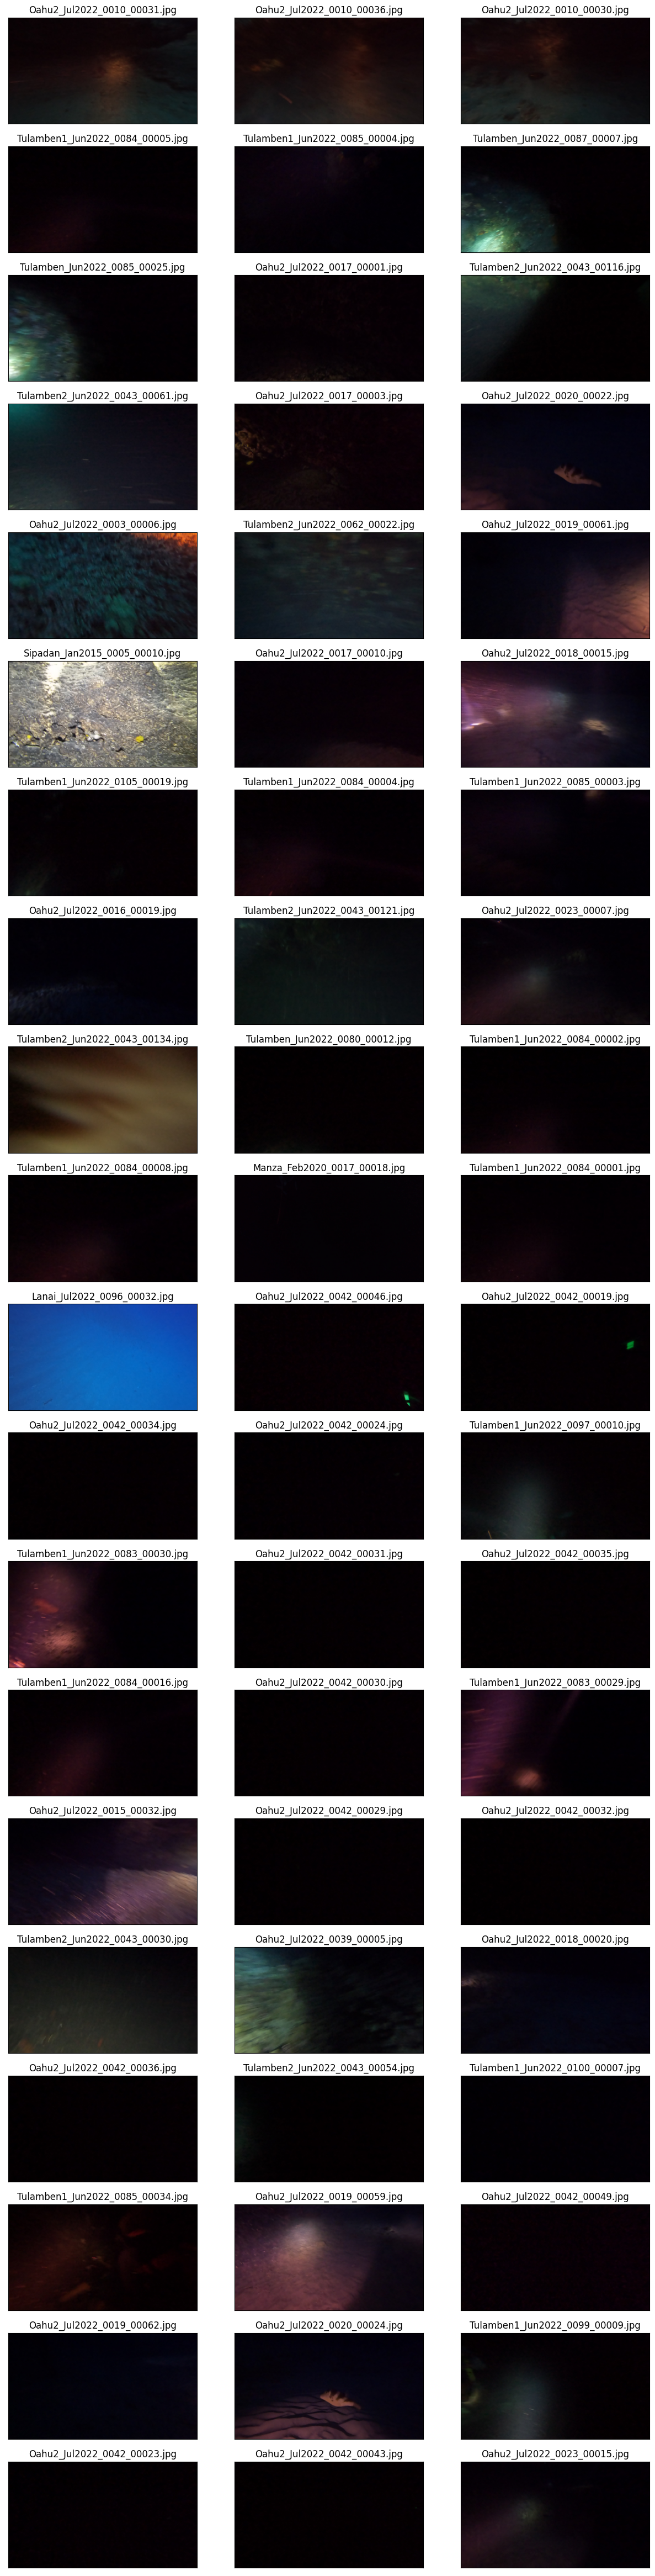

In [11]:
# dataset_helpers.display_results(best_images[:100], figsize=(15, 60), subplot_size=(20,3))

### V3C Dataset

In [4]:
vbs_path = '/mnt/shared_48tb/vbs/VBS2022/metadata'

In [5]:
image_names = joblib.load(osp.join(vbs_path, 'image_names.joblib'))

In [6]:
len(image_names)

2508110

In [13]:
temp = [x[12:] for x in image_names]

In [16]:
helpers.save_list_to_txt(temp, '/mnt/shared_48tb/vbs/VBS2022/V3C_image_names.txt')